In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random as rd
from sklearn.decomposition import PCA


In [ ]:
genes = ['gene' + str(i) for i in range(1, 101)]

In [ ]:
wt = ['wt' + str(i) for i in range(1,6)]
ko = ['ko' + str(i) for i in range(1,6)]

In [ ]:
df = pd.DataFrame(columns = [*wt, *ko], index = genes)

In [ ]:
for gene in df.index:
  df.loc[gene, 'wt1' : 'wt5'] = np.random.poisson(lam = rd.randrange(10, 1000), size = 5)
  df.loc[gene, 'ko1' : 'ko5'] = np.random.poisson(lam = rd.randrange(10, 1000), size = 5)

In [ ]:
df.head()

,wt1,wt2,wt3,wt4,wt5,ko1,ko2,ko3,ko4,ko5
gene1,26,22,19,20,23,532,507,542,519,559
gene2,312,298,293,309,309,647,652,586,662,613
gene3,761,757,818,746,853,166,173,167,154,174
gene4,32,36,45,49,37,156,153,124,121,123
gene5,523,536,535,508,516,970,980,946,983,985


In [ ]:
df.shape

(100, 10)

In [ ]:
from sklearn import preprocessing

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [ ]:
ds = sc.fit_transform(df.T)

In [ ]:
pca = PCA()

In [ ]:
pca.fit(ds)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
pcadata = pca.transform(ds)

In [ ]:
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)
labels = ['PC' + str(i) for i in range(1, len(per_var)+1)]

<BarContainer object of 10 artists>

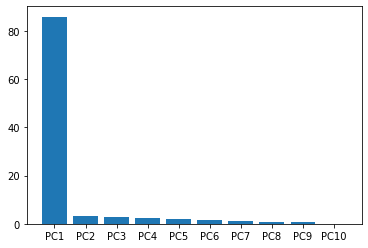

In [ ]:
plt.bar(x = range(1, len(per_var) + 1), height= per_var, tick_label = labels)

In [ ]:
pca_df = pd.DataFrame(pcadata, index = [*wt, *ko], columns = labels)

In [ ]:
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
wt1,-9.145737,-2.408411,-1.539474,-0.905030,-0.896801,0.104112,2.008582,-0.002144,0.945155,6.132572e-16
wt2,-9.471719,2.134433,-1.074546,2.831166,0.611075,-1.461093,0.608350,0.583116,-0.271316,4.898167e-16
wt3,-9.040383,-0.820887,-2.036681,-1.580350,-0.163644,0.173399,-1.570402,0.313979,-1.455392,1.035338e-15
wt4,-9.191783,0.627771,1.422948,0.120160,-0.830043,0.256181,-2.004289,0.068991,1.566238,-1.137203e-15
wt5,-9.441788,0.362331,3.119809,-0.476956,1.323405,0.939874,0.900852,-1.013225,-0.763530,1.294958e-16


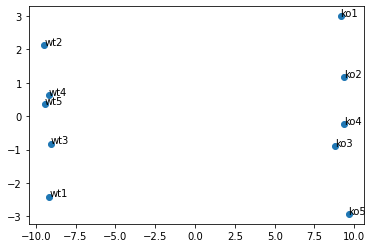

In [ ]:
plt.scatter(pca_df['PC1'], pca_df['PC2'])
for sample in pca_df.index:
  plt.annotate(sample, (pca_df['PC1'].loc[sample], pca_df['PC2'].loc[sample]))

In [ ]:
import os

In [ ]:
os.chdir('/content/drive/MyDrive/Time Series')

In [ ]:
ls

'ARIMA Model.ipynb'           'Naive Smoothing technique.ipynb'
'ARIMA Model New.ipynb'        PCA.ipynb
'Auto Regression.ipynb'        regression_data.xlsx
 Debourgh-Sales.xlsx           Regression.ipynb
'First Time Series.ipynb'      sales_data.csv
'Forcasting 2.ipynb'           SmoothingTechniques.ipynb
 Forcasting.ipynb              Social_Network_Ads.csv
 Microsoft_Stock.csv           Untitled0.ipynb
'Microsoft Stock.ipynb'        us_airline_carrier_passenger.csv
'Multiplicative model.ipynb'   Wine.csv


In [ ]:
df = pd.read_csv('Wine.csv')

In [ ]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [ ]:
df.shape

(178, 14)

In [ ]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [ ]:
xtrain = sc.fit_transform(xtrain)
xtest = sc.transform(xtest)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [ ]:
xtrainp = pca.fit_transform(xtrain)

In [ ]:
xtestp = pca.transform(xtest)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
reg = LogisticRegression(random_state = 0)

In [ ]:
reg.fit(xtrainp, ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
ypred = reg.predict(xtestp)

In [ ]:
cm = confusion_matrix(ytest, ypred)
cm

array([[14,  0,  0],
       [ 1, 15,  0],
       [ 0,  0,  6]])

In [ ]:
accuracy_score(ytest, ypred)

0.9722222222222222

In [ ]:
ls

'ARIMA Model.ipynb'           'Naive Smoothing technique.ipynb'
'ARIMA Model New.ipynb'        PCA.ipynb
'Auto Regression.ipynb'        regression_data.xlsx
 Debourgh-Sales.xlsx           Regression.ipynb
'First Time Series.ipynb'      sales_data.csv
'Forcasting 2.ipynb'           SmoothingTechniques.ipynb
 Forcasting.ipynb              Social_Network_Ads.csv
 Microsoft_Stock.csv           Untitled0.ipynb
'Microsoft Stock.ipynb'        us_airline_carrier_passenger.csv
'Multiplicative model.ipynb'   Wine.csv


In [ ]:
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(xtrain, ytrain)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = xtrain, y = ytrain, cv = 10)

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [0.25, 0.5, 0.75, 1], 'kernel': ['linear']},
              {'C': [0.25, 0.5, 0.75, 1], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)


Best Accuracy: 90.67 %
Best Parameters: {'C': 0.5, 'gamma': 0.6, 'kernel': 'rbf'}
